# Road Accident Prediction for Drivers’ Safety

# Data Analysis

In [3]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
# imporint dataset from google drive

file_path = "/content/drive/MyDrive/US_Accidents_March23_sampled_500k.csv"

#data set can be directly loaded

#df = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

df = pd.read_csv(file_path)
df.shape
df.head()

print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [4]:
print(df.describe())


            Severity      Start_Lat      Start_Lng        End_Lat  \
count  500000.000000  500000.000000  500000.000000  279623.000000   
mean        2.212748      36.206421     -94.736583      36.273192   
std         0.486661       5.071411      17.405761       5.265333   
min         1.000000      24.562117    -124.497420      24.570110   
25%         2.000000      33.416823    -117.233047      33.474773   
50%         2.000000      35.832147     -87.794365      36.192669   
75%         2.000000      40.082443     -80.359601      40.181341   
max         4.000000      48.999569     -67.484130      48.998901   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  279623.000000  500000.000000   489534.000000  370983.000000   
mean      -95.776553       0.564317       61.646254      58.229028   
std        18.120211       1.774872       19.000133      22.352246   
min      -124.497419       0.000000      -77.800000     -53.200000   
25%      -117.778324       0

In [5]:
#checking for any duplication
df.duplicated().sum()

np.int64(0)

In [7]:
# Checking for missing values
print(df.isnull().sum())

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

In [8]:
# Make a list of features that have NaN values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

# Calculate the percentage of missing values for each feature
missing_percent = df[features_with_na].isnull().sum().sort_values(ascending=False) / len(df) * 100

print(missing_percent)



End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Sunrise_Sunset            0.2966
Civil_Twilight            0.2966
Nautical_Twilight         0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
dtype: float64


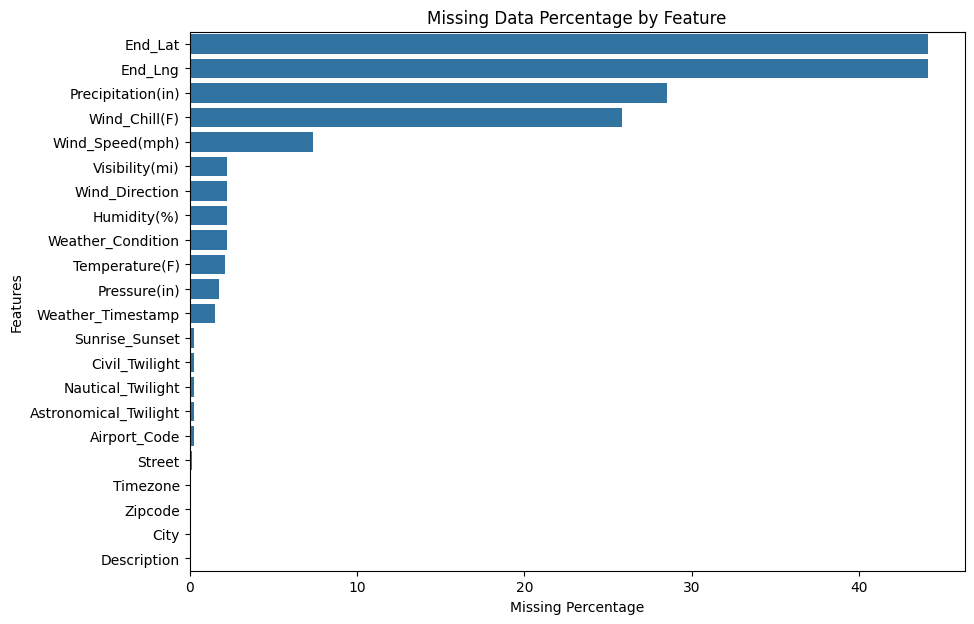

In [9]:
# Plot for percentages of missing value for all features
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [10]:
#selecting the features
selected_cols = [
    'Severity',
    'Weather_Condition',
    'Visibility(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Precipitation(in)',
    'Wind_Speed(mph)',
    'Wind_Direction',
    'Start_Time',
    'Sunrise_Sunset',
    'State',
    'City',
    'Bump',
    'Amenity',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Turning_Loop']

df = df[selected_cols]

In [11]:
# Select the columns
df = df[selected_cols]

# Look at the first few rows
print(df.head())

# Check missing data for these columns
print(df.isnull().sum())

   Severity Weather_Condition  Visibility(mi)  Temperature(F)  Humidity(%)  \
0         2              Fair            10.0            77.0         62.0   
1         2              Fair            10.0            45.0         48.0   
2         2              Fair            10.0            68.0         73.0   
3         2        Wintry Mix            10.0            27.0         86.0   
4         2              Fair            10.0            42.0         34.0   

   Precipitation(in)  Wind_Speed(mph) Wind_Direction  \
0                0.0              5.0             NW   
1                0.0              5.0              W   
2                0.0             13.0              W   
3                0.0             15.0            ENE   
4                0.0              0.0           CALM   

                      Start_Time Sunrise_Sunset  ... Give_Way Junction  \
0            2019-06-12 10:10:56            Day  ...    False    False   
1  2022-12-03 23:37:14.000000000          Nigh

In [12]:

# Make a list of features that have NaN values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

# Calculate the percentage of missing values for each feature
missing_percent = df[features_with_na].isnull().sum().sort_values(ascending=False) / len(df) * 100

print(missing_percent)

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Sunrise_Sunset        0.2966
City                  0.0038
dtype: float64


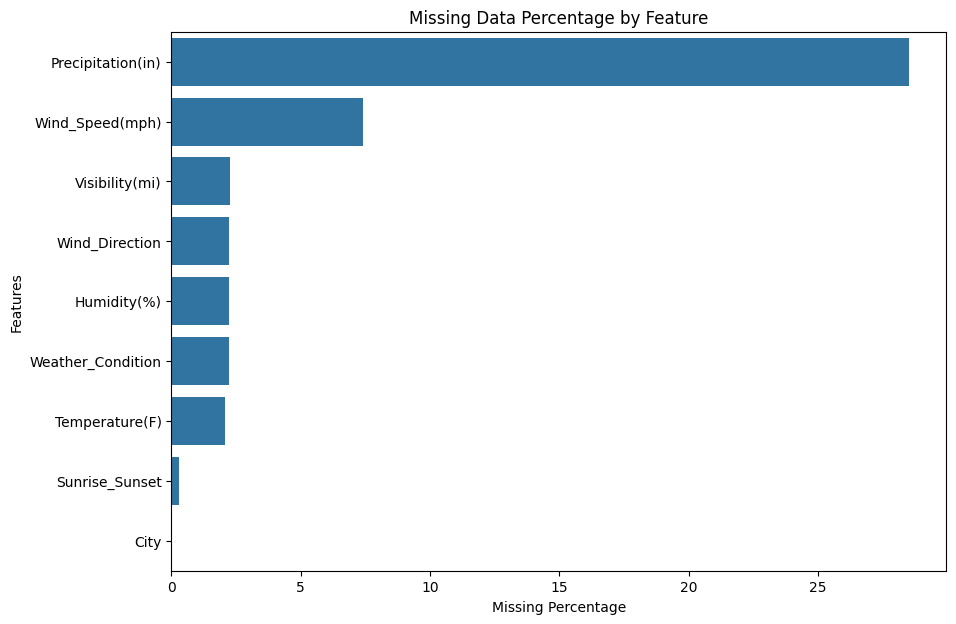

In [13]:
# Plot the missing percentages for all features
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [14]:
# Shape before dropping
print('Original shape:', df.shape)

# Remove rows where Precipitation(in) is NaN
df_no_precip_nan = df.dropna(subset=['Precipitation(in)'])

# Shape after dropping
print('Shape after removing Precipitation(in) NaNs:', df_no_precip_nan.shape)


Original shape: (500000, 25)
Shape after removing Precipitation(in) NaNs: (357384, 25)


In [15]:
# Missing counts before droping missing value in Precipitation(in)
print('Missing counts before:')
print(df.isnull().sum())

# Missing counts after droping missing value in Precipitation(in)
print('\nMissing counts after dropping Precipitation(in) NaNs:')
print(df_no_precip_nan.isnull().sum())


Missing counts before:
Severity                  0
Weather_Condition     11101
Visibility(mi)        11291
Temperature(F)        10466
Humidity(%)           11130
Precipitation(in)    142616
Wind_Speed(mph)       36987
Wind_Direction        11197
Start_Time                0
Sunrise_Sunset         1483
State                     0
City                     19
Bump                      0
Amenity                   0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

Missing counts after dropping Precipitation(in) NaNs:
Severity                0
Weather_Condition    1854
Visibility(mi)       2154
Temperature(F)       1734
Humidity(%)          2280
Precipitation(in)       0
Wind_Speed(mph)      5167
Wind_Direction       3413
S

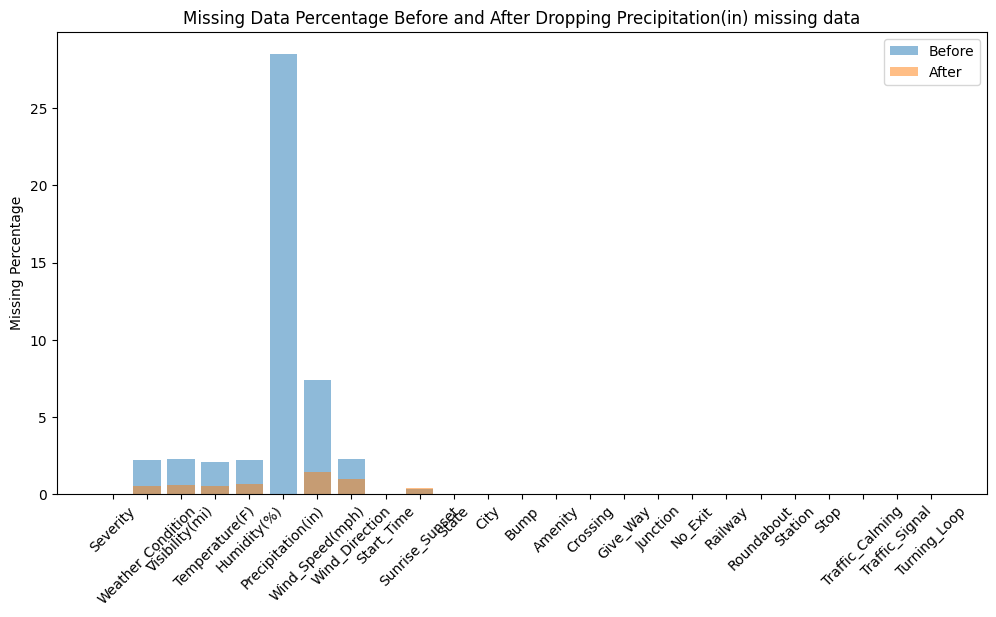

In [16]:


# Before
missing_percent_before = (df.isnull().sum() / len(df)) * 100

# After
missing_percent_after = (df_no_precip_nan.isnull().sum() / len(df_no_precip_nan)) * 100

plt.figure(figsize=(12,6))
plt.bar(missing_percent_before.index, missing_percent_before.values, alpha=0.5, label='Before')
plt.bar(missing_percent_after.index, missing_percent_after.values, alpha=0.5, label='After')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.title('Missing Data Percentage Before and After Dropping Precipitation(in) missing data')
plt.legend()
plt.show()


In [17]:
#removing all the missing value
df = df.dropna()


In [18]:
print(df.isnull().sum())
print(df.info())
print(df.describe())
display(df.head())
print(df.isnull().sum())
df.shape

Severity             0
Weather_Condition    0
Visibility(mi)       0
Temperature(F)       0
Humidity(%)          0
Precipitation(in)    0
Wind_Speed(mph)      0
Wind_Direction       0
Start_Time           0
Sunrise_Sunset       0
State                0
City                 0
Bump                 0
Amenity              0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 347649 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           347649 non-null  int64  
 1   Weather_Condition  347649 non-null  object 
 2   Visibility(mi)     347649 non-null  float64
 3   Temperature(F)     347649 non-null  float64
 4   Humidit

,Severity,Weather_Condition,Visibility(mi),Temperature(F),Humidity(%),Precipitation(in),Wind_Speed(mph),Wind_Direction,Start_Time,Sunrise_Sunset,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2,Fair,10.0,77.0,62.0,0.0,5.0,NW,2019-06-12 10:10:56,Day,...,False,False,False,False,False,False,False,False,True,False
1,2,Fair,10.0,45.0,48.0,0.0,5.0,W,2022-12-03 23:37:14.000000000,Night,...,False,False,False,False,False,False,False,False,False,False
2,2,Fair,10.0,68.0,73.0,0.0,13.0,W,2022-08-20 13:13:00.000000000,Day,...,False,False,False,False,False,False,False,False,True,False
3,2,Wintry Mix,10.0,27.0,86.0,0.0,15.0,ENE,2022-02-21 17:43:04,Day,...,False,False,False,False,False,False,False,False,False,False
4,2,Fair,10.0,42.0,34.0,0.0,0.0,CALM,2020-12-04 01:46:00,Night,...,False,False,False,False,False,False,False,False,False,False


Severity             0
Weather_Condition    0
Visibility(mi)       0
Temperature(F)       0
Humidity(%)          0
Precipitation(in)    0
Wind_Speed(mph)      0
Wind_Direction       0
Start_Time           0
Sunrise_Sunset       0
State                0
City                 0
Bump                 0
Amenity              0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64


(347649, 25)

# Exploratory Data Analysis (EDA)

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# rows are drop where Start_Time could not be converted
df = df.dropna(subset=['Start_Time'])

In [20]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
print(df['Start_Time'].dtype)





datetime64[ns]


In [21]:
df.shape
display(df.head())

,Severity,Weather_Condition,Visibility(mi),Temperature(F),Humidity(%),Precipitation(in),Wind_Speed(mph),Wind_Direction,Start_Time,Sunrise_Sunset,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour,Weekday,Month,Year
0,2,Fair,10.0,77.0,62.0,0.0,5.0,NW,2019-06-12 10:10:56,Day,...,False,False,False,False,True,False,10,Wednesday,6,2019
3,2,Wintry Mix,10.0,27.0,86.0,0.0,15.0,ENE,2022-02-21 17:43:04,Day,...,False,False,False,False,False,False,17,Monday,2,2022
4,2,Fair,10.0,42.0,34.0,0.0,0.0,CALM,2020-12-04 01:46:00,Night,...,False,False,False,False,False,False,1,Friday,12,2020
5,2,Fair,10.0,42.0,58.0,0.0,13.0,W,2021-03-29 07:03:58,Day,...,False,False,False,False,True,False,7,Monday,3,2021
6,2,Light Rain,10.0,35.0,89.0,0.0,0.0,CALM,2020-01-14 16:49:23,Day,...,False,False,False,False,False,False,16,Tuesday,1,2020


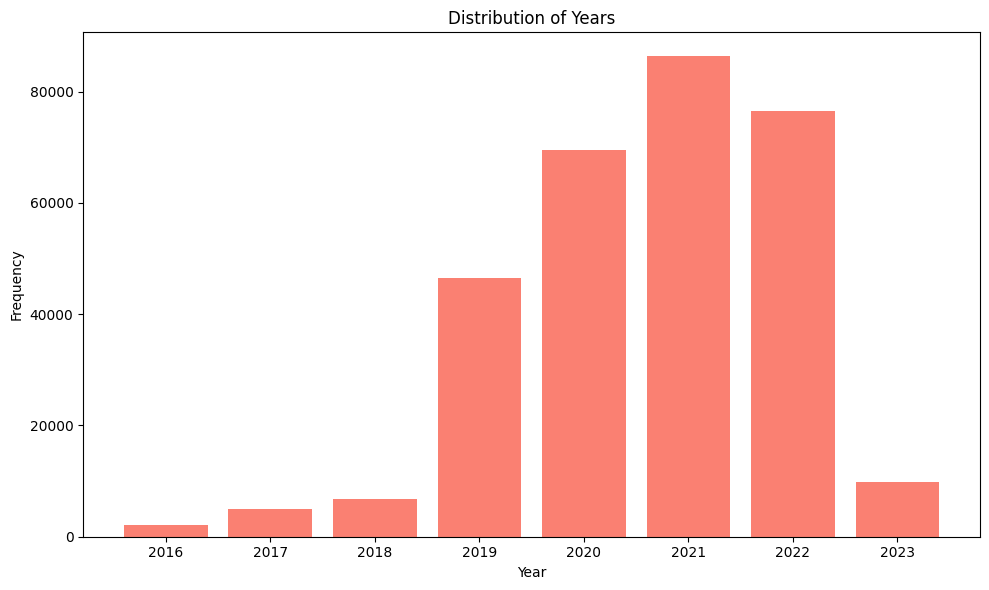

In [22]:
#accident by year
year_frequency = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(year_frequency.index.astype(int), year_frequency.values, color='salmon')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

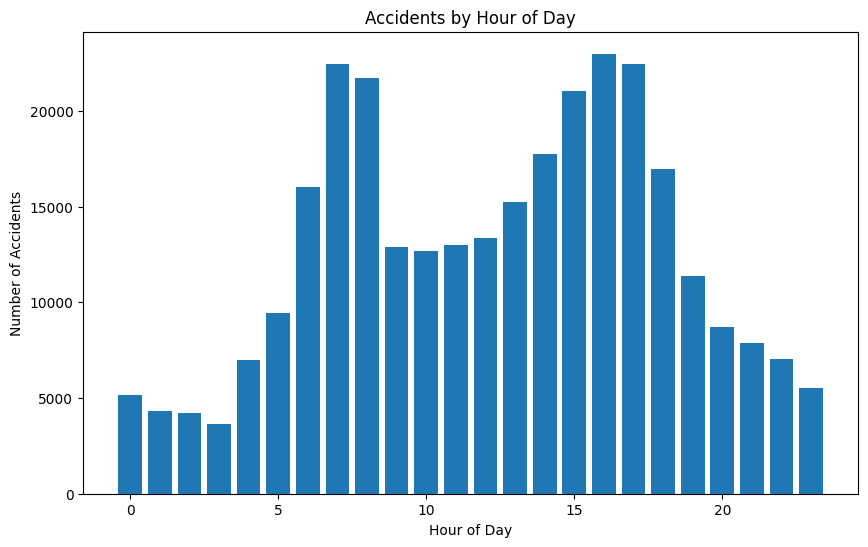

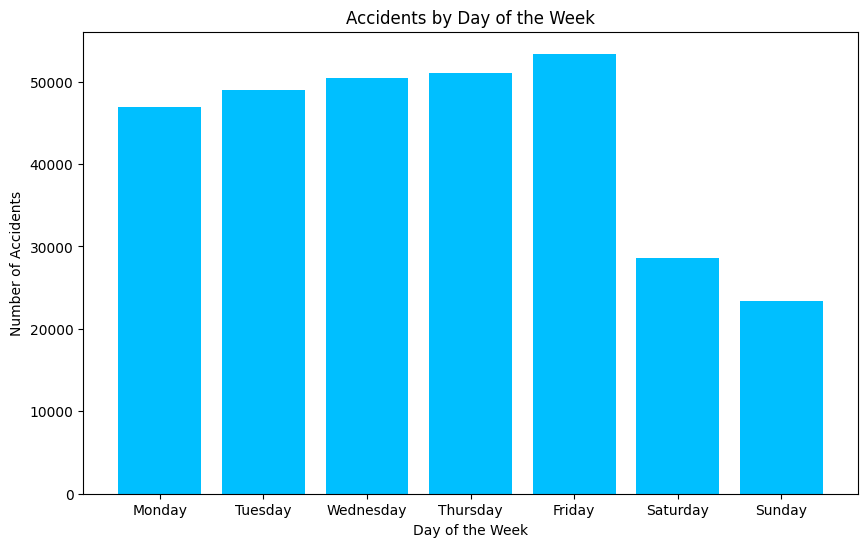

In [23]:


#accident by hour
hour_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of Day')
plt.show()


#accident by week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10,6))
plt.bar(weekday_counts.index, weekday_counts.values,color='deepskyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.show()




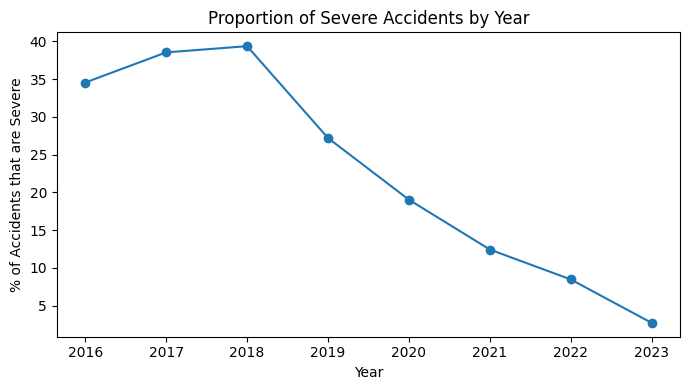

In [24]:
#Severe indicates whether an accident was classified as major or fatal which is Severity 3 or 4)
df['Severe'] = df['Severity'].isin([3,4])
yearly_severe = df.groupby('Year')['Severe'].mean()

plt.figure(figsize=(7,4))
plt.plot(yearly_severe.index, yearly_severe.values*100, marker='o')
plt.xlabel('Year')
plt.ylabel('% of Accidents that are Severe')
plt.title('Proportion of Severe Accidents by Year')
plt.tight_layout()
plt.show()


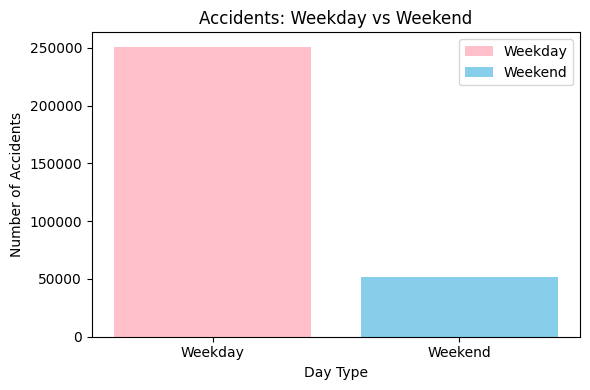

In [25]:
# Add a column that labels each row as 'Weekday' or 'Weekend'
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
import matplotlib.pyplot as plt

# Accident count by day type
daytype_counts = df['DayType'].value_counts()


plt.figure(figsize=(6,4))
bars = plt.bar(daytype_counts.index, daytype_counts.values, color=['pink', 'skyblue'])
plt.xlabel('Day Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents: Weekday vs Weekend')
plt.legend(bars, ['Weekday', 'Weekend'], loc='upper right', frameon=True)

plt.tight_layout()
plt.show()



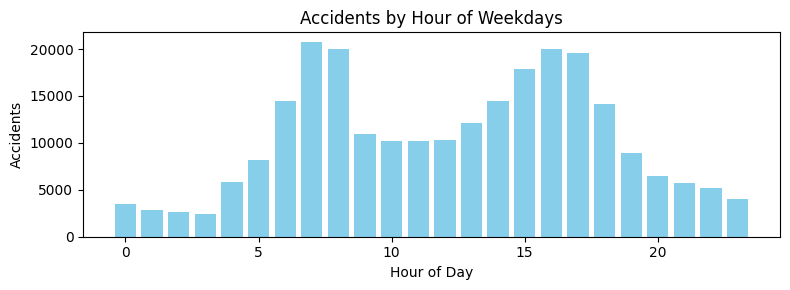

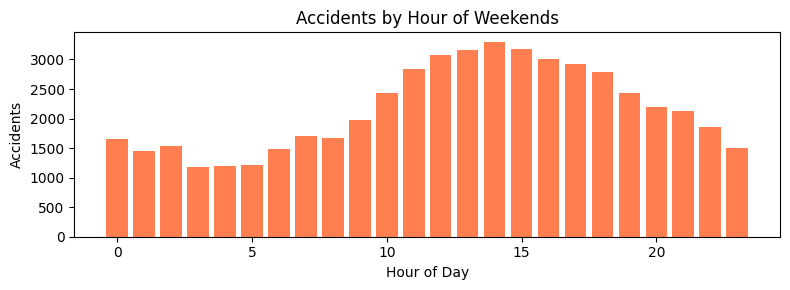

In [26]:

# Accidents by hour for weekdays
weekday_hours = df[df['DayType'] == 'Weekday']['Hour']
weekday_counts = weekday_hours.value_counts().sort_index()

plt.figure(figsize=(8, 3))
plt.bar(weekday_counts.index, weekday_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Accidents')
plt.title('Accidents by Hour of Weekdays')
plt.tight_layout()
plt.show()

# Accidents by hour for weekends
weekend_hours = df[df['DayType'] == 'Weekend']['Hour']
weekend_counts = weekend_hours.value_counts().sort_index()

plt.figure(figsize=(8, 3))
plt.bar(weekend_counts.index, weekend_counts.values, color='coral')
plt.xlabel('Hour of Day')
plt.ylabel('Accidents')
plt.title('Accidents by Hour of Weekends')
plt.tight_layout()
plt.show()



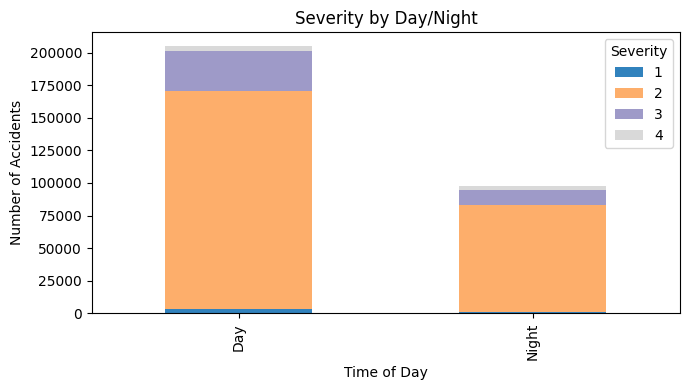

In [27]:
daynight_crosstab = pd.crosstab(df['Sunrise_Sunset'], df['Severity'])
daynight_crosstab.plot(kind='bar', stacked=True, figsize=(7,4), colormap='tab20c')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Severity by Day/Night')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


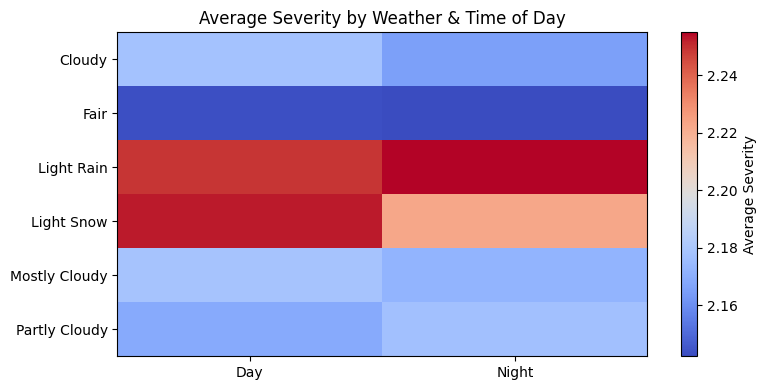

In [28]:
if 'Sunrise_Sunset' in df.columns:
    top_weather = df['Weather_Condition'].value_counts().head(6).index
    pivot = df[df['Weather_Condition'].isin(top_weather)].pivot_table(
        index='Weather_Condition', columns='Sunrise_Sunset', values='Severity', aggfunc='mean'
    )
    plt.figure(figsize=(8,4))
    plt.imshow(pivot, cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Average Severity')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.title('Average Severity by Weather & Time of Day')
    plt.tight_layout()
    plt.show()



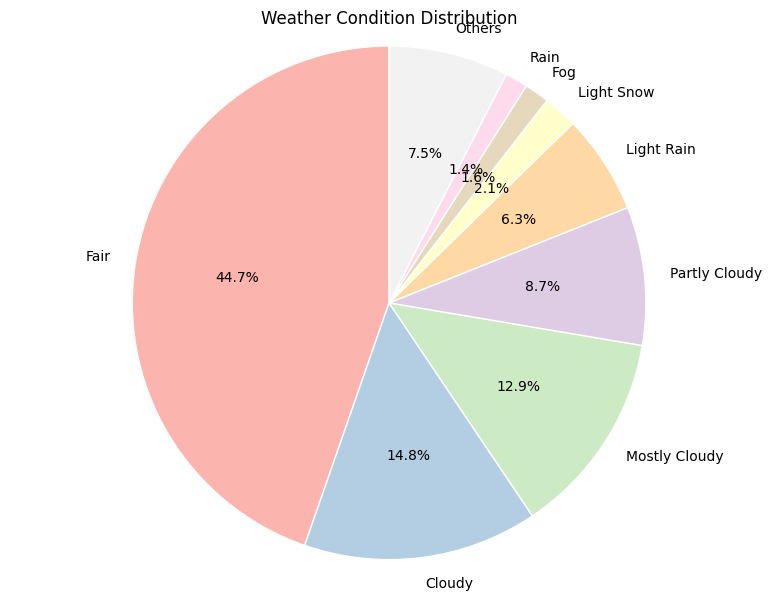

In [29]:


#Count the frequency of each weather condition
weather_counts = df['Weather_Condition'].value_counts()

#Select the top 8 most frequent weather conditions
top_conditions = weather_counts.head(8)

#Group all other less frequent conditions into "Others"
other_conditions_count = weather_counts.iloc[8:].sum()

# prepare a DataFrame
summary_weather_counts = pd.DataFrame({
    'Weather_Condition': list(top_conditions.index) + ['Others'],
    'Count': list(top_conditions.values) + [other_conditions_count]
})

# choose a color palette
colors = plt.cm.Pastel1.colors[:len(summary_weather_counts)]

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    summary_weather_counts['Count'],
    labels=summary_weather_counts['Weather_Condition'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()




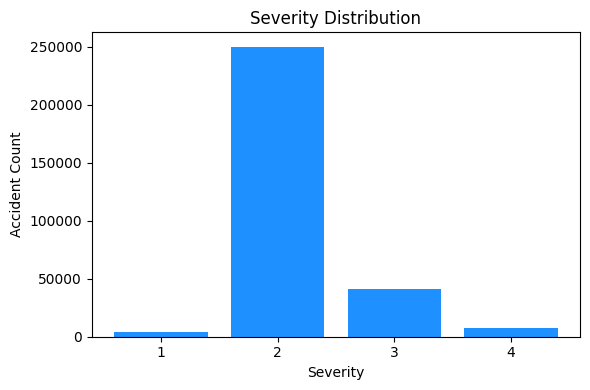

In [30]:
# Bar chart
severity_counts = df['Severity'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(severity_counts.index.astype(str), severity_counts.values, color='dodgerblue')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.title('Severity Distribution')
plt.tight_layout()
plt.show()


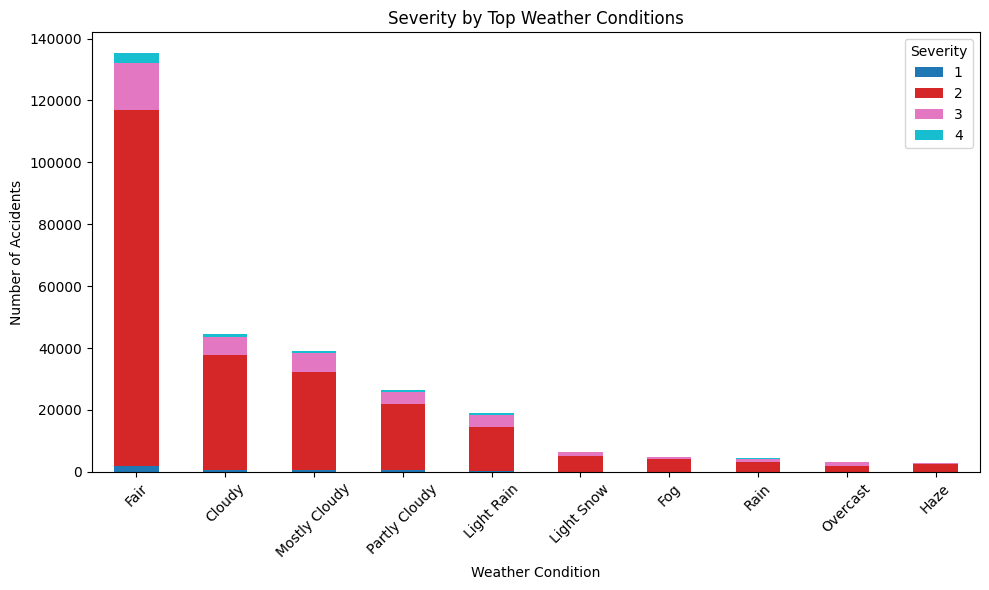

In [37]:

top_weather = df['Weather_Condition'].value_counts().head(10).index
df_top = df[df['Weather_Condition'].isin(top_weather)]
crosstab = pd.crosstab(df_top['Weather_Condition'], df_top['Severity']).reindex(index=top_weather)

crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab10')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Severity by Top Weather Conditions')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()



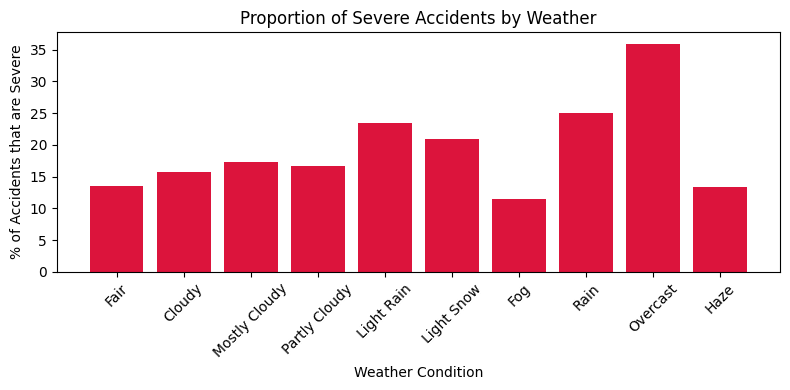

In [38]:
# severe as severity for 3 or 4
#Severe indicates whether an accident was classified as major or fatal which is Severity 3 or 4)

df['Severe'] = df['Severity'].isin([3,4])
proportion_severe = df.groupby('Weather_Condition')['Severe'].mean().sort_values(ascending=False)


top_weather = df['Weather_Condition'].value_counts().head(10).index
proportion_top = proportion_severe.loc[top_weather]

plt.figure(figsize=(8,4))
plt.bar(proportion_top.index, proportion_top.values * 100, color='crimson')
plt.ylabel('% of Accidents that are Severe')
plt.xlabel('Weather Condition')
plt.title('Proportion of Severe Accidents by Weather')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Proportion of severity of 3 and 4 in each weather
df_top.loc[:, 'Severe'] = df_top['Severity'].isin([3,4])
proportion_severe = df_top.groupby('Weather_Condition')['Severe'].mean()
print(proportion_severe)


Weather_Condition
Cloudy           0.157266
Fair             0.134770
Fog              0.113913
Haze             0.133676
Light Rain       0.233953
Light Snow       0.209442
Mostly Cloudy    0.173712
Overcast         0.359345
Partly Cloudy    0.165946
Rain             0.249712
Name: Severe, dtype: float64


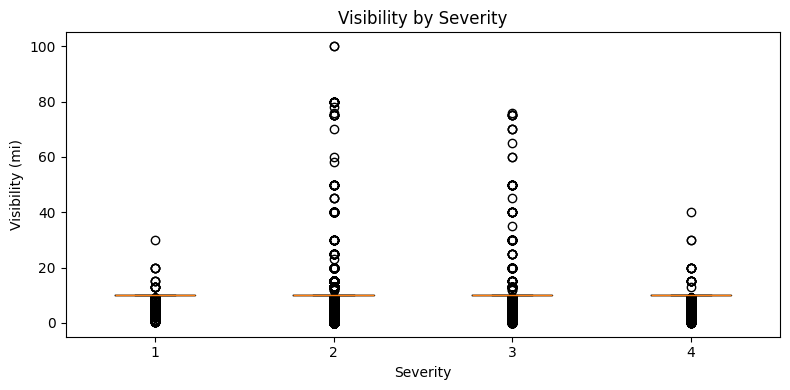

In [48]:
# Visibility by Severity box plot
severity_levels = sorted(df['Severity'].unique())
data_vis = [df[df['Severity']==sev]['Visibility(mi)'] for sev in severity_levels]
plt.figure(figsize=(8,4))
plt.boxplot(data_vis, tick_labels=severity_levels)
plt.xlabel('Severity')
plt.ylabel('Visibility (mi)')
plt.title('Visibility by Severity')
plt.tight_layout()
plt.show()



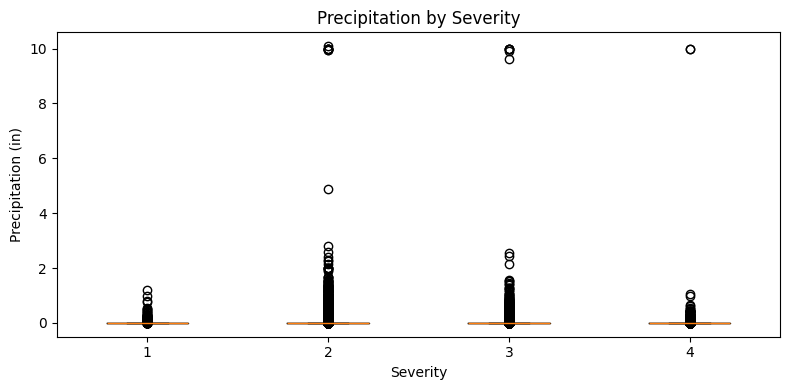

In [47]:
#Precipitation by Severity
data_precip = [df[df['Severity']==sev]['Precipitation(in)'] for sev in severity_levels]
plt.figure(figsize=(8,4))
plt.boxplot(data_precip, tick_labels=severity_levels)  # instead of labels=severity_levels

plt.xlabel('Severity')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation by Severity')
plt.tight_layout()
plt.show()


In [42]:
df['State'].unique()

array(['LA', 'MN', 'CA', 'MA', 'OR', 'TX', 'IN', 'MT', 'AL', 'AZ', 'FL',
       'VA', 'SC', 'KS', 'NC', 'CO', 'GA', 'PA', 'NY', 'NV', 'NJ', 'TN',
       'IL', 'MS', 'NM', 'UT', 'WA', 'MO', 'OH', 'CT', 'OK', 'MD', 'MI',
       'IA', 'DC', 'WV', 'RI', 'WI', 'AR', 'NH', 'WY', 'KY', 'NE', 'DE',
       'ID', 'ND', 'ME', 'VT', 'SD'], dtype=object)

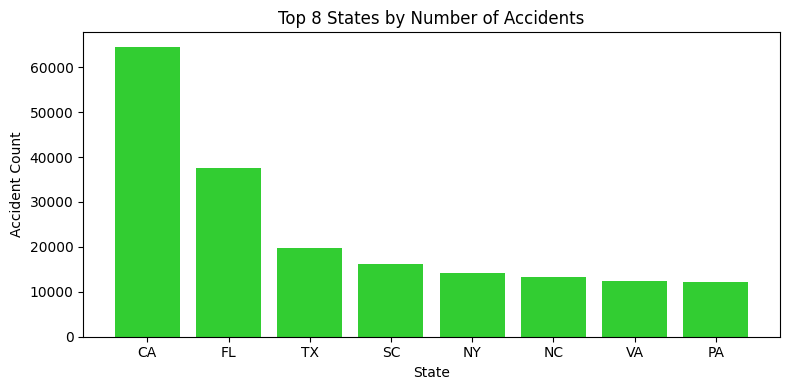

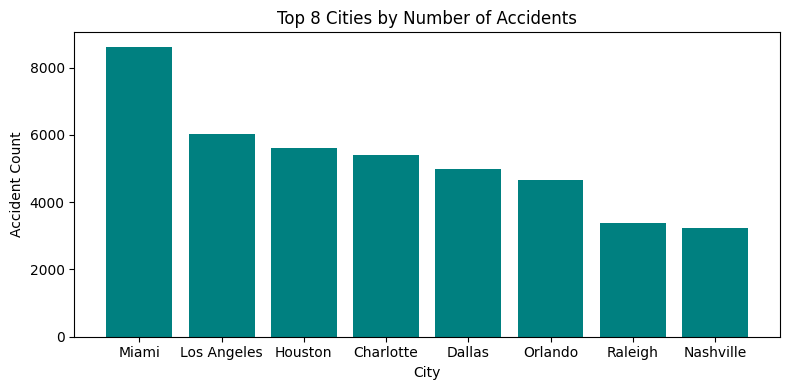

In [43]:
# By state (top 8)
state_counts = df['State'].value_counts().head(8)
plt.figure(figsize=(8,4))
plt.bar(state_counts.index, state_counts.values, color='limegreen')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.title('Top 8 States by Number of Accidents')
plt.tight_layout()
plt.show()

# By city (top 8)
city_counts = df['City'].value_counts().head(8)
plt.figure(figsize=(8,4))
plt.bar(city_counts.index, city_counts.values, color='teal')
plt.xlabel('City')
plt.ylabel('Accident Count')
plt.title('Top 8 Cities by Number of Accidents')
plt.tight_layout()
plt.show()



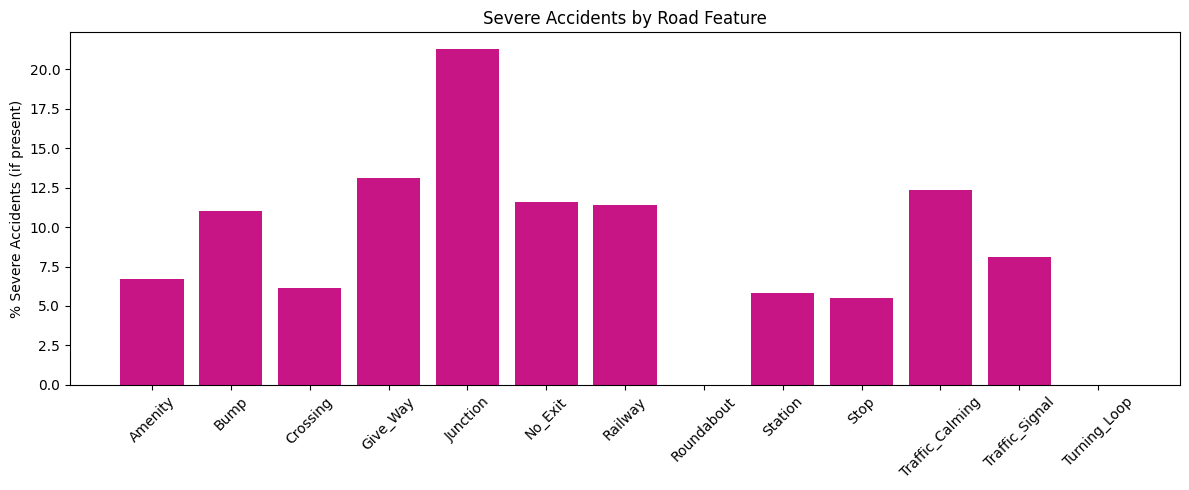

In [46]:


feature_list = [
    'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
    'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop'
]
# Only consider rows where the feature is present
proportions = []
for feature in feature_list:
    if feature in df.columns:
        present = df[df[feature] == 1]
        if len(present) > 0:
            prop = present['Severe'].mean() * 100
        else:
            prop = 0
        proportions.append(prop)

plt.figure(figsize=(12,5))
plt.bar(feature_list, proportions, color='mediumvioletred')
plt.ylabel('% Severe Accidents (if present)')
plt.title('Severe Accidents by Road Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
